In [1]:
import pandas as pd

data = pd.read_csv('games.csv')


data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
#Célula para renomear colunas minúsculas

data.columns = data.columns.str.lower()

print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [9]:
import numpy as np

data['user_score'] = data['user_score'].replace('TBD', np.nan)
print(data.head())

# Convertir a coluna para o tipo numérico float.
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

print("Tipo de user_score após a conversão:")
print(data['user_score'].dtype)


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  
Tipo de user_score após a conversão:
float64


In [10]:
 # Verificação das primeiras linhas e a contagem de nulos.
print("\nVerificação dos nulos e primeiras linhas:")
data.info()


Verificação dos nulos e primeiras linhas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [14]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype(int)

print("Tipo de year_of_release após a conversão:")
print(data['year_of_release'].dtype)

print("\nVerificação de números de linhas restantes:")
data.info()

Tipo de year_of_release após a conversão:
int64

Verificação de números de linhas restantes:
<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
data['rating'] = data['rating'].fillna('NoRating')
print("Nova contagem de 'rating':")
print(data['rating'].value_counts())

Nova contagem de 'rating':
rating
NoRating    6678
E           3921
T           2905
M           1536
E10+        1393
EC             8
K-A            3
AO             1
RP             1
Name: count, dtype: int64


In [20]:
#  Coluna  de vendas chamada 'total_sales'
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Verificação da coluna
print("\nPrimeiras 5 linhas com a nova coluna total_sales:")
print(data[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())


Primeiras 5 linhas com a nova coluna total_sales:
                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports    123.72     28.96      3.77         8.45   
1         Super Mario Bros.     51.40      3.58      6.81         0.77   
2            Mario Kart Wii     55.36     12.76      3.79         3.29   
3         Wii Sports Resort     49.93     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     51.49      8.89     10.22         1.00   

   total_sales  
0       164.90  
1        62.56  
2        75.20  
3        67.09  
4        71.60  


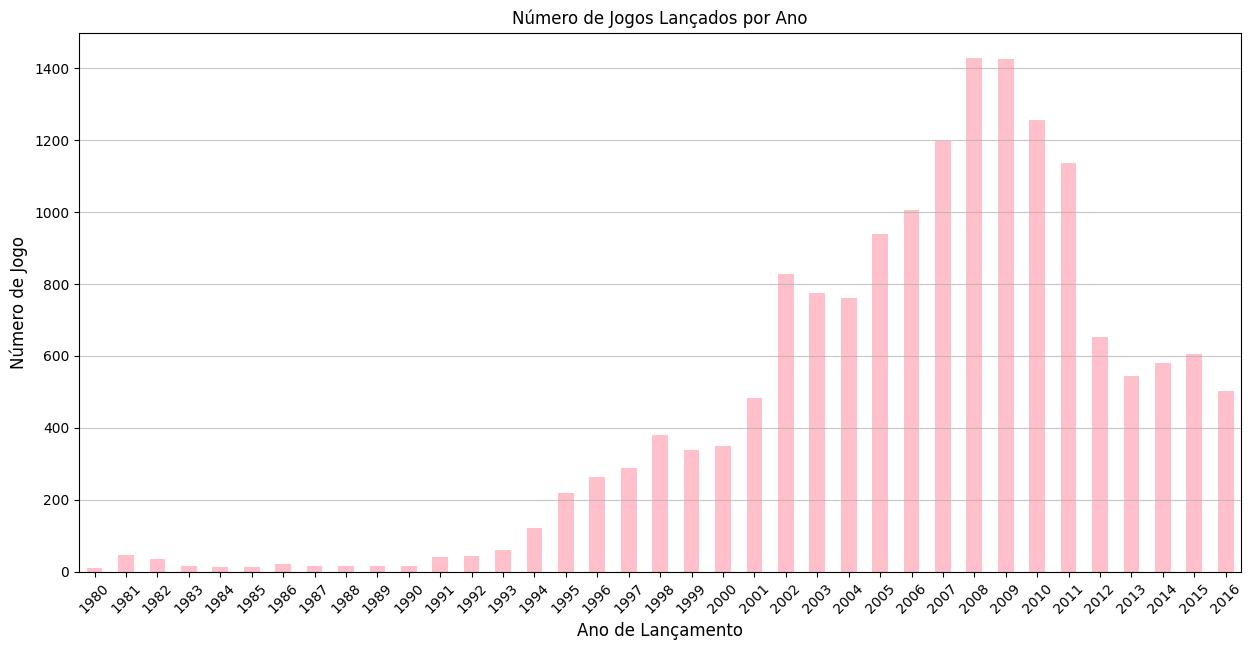

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

games_per_year = data.groupby('year_of_release')['name'].count()
plt.figure(figsize=(15, 7))
games_per_year.plot(kind='bar', title='Número de Jogos Lançados por Ano', color='pink')
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Número de Jogo', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [24]:
# Venda Totais por Plataforma.
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 Plataformas:\n", platform_sales)

Top 10 Plataformas:
 platform
PS2     2554.84
PS3     2013.76
Wii     1699.80
X360    1692.24
DS      1647.72
PS      1513.30
PS4      724.94
PSP      654.05
3DS      608.13
PC       580.60
Name: total_sales, dtype: float64


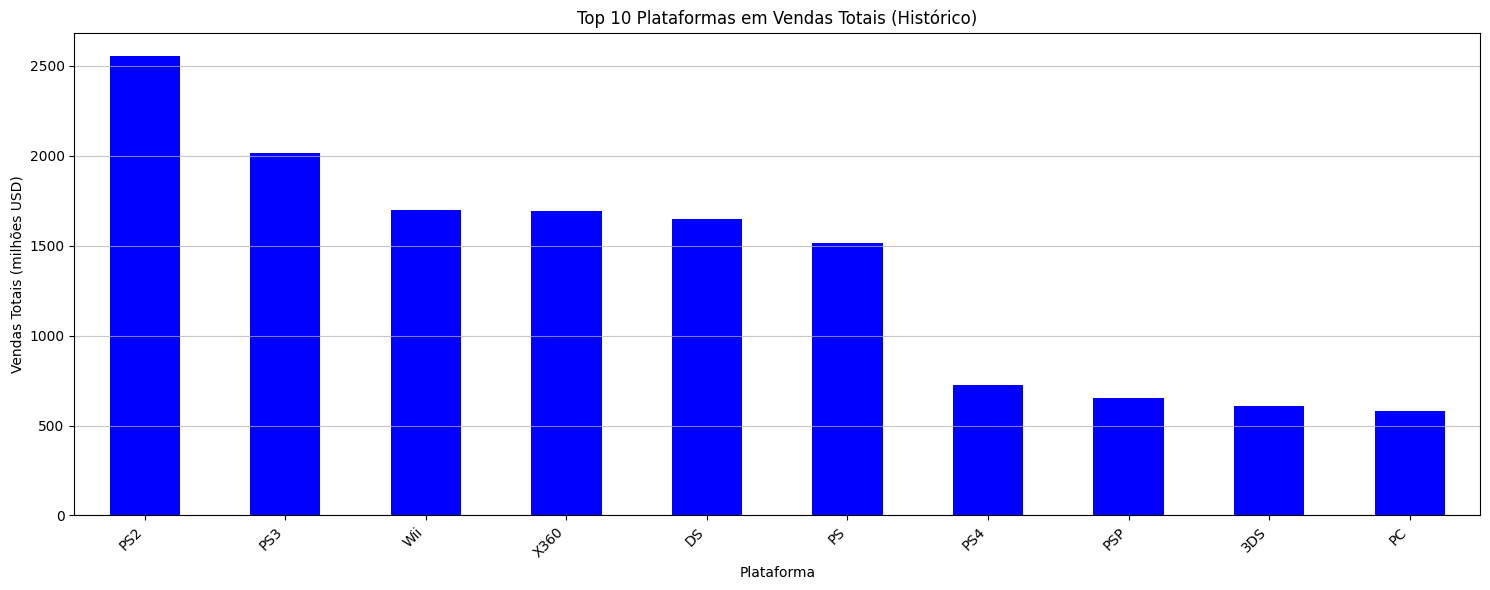

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
platform_sales.plot(kind='bar', title='Top 10 Plataformas em Vendas Totais (Histórico)', color='blue')
plt.ylabel('Vendas Totais (milhões USD)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45,
           ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
# O ano inicial relevante
relevant_period_start = 2013 

# Criação de um novo DataFrame filtrado
data_filtered = data[data['year_of_release'] >= relevant_period_start].copy()

print(f"Número de jogos no dataset original: {len(data)}")
print(f"Número de jogos no dataset filtrado (a partir de {relevant_period_start}): {len(data_filtered)}")
print("\nInformações do novo dataset filtrado:")
data_filtered.info()

Número de jogos no dataset original: 16446
Número de jogos no dataset filtrado (a partir de 2013): 2233

Informações do novo dataset filtrado:
<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Plataformas Líderes no Período 2013-2016:
 platform
PS4     724.94
PS3     417.29
3DS     353.35
XOne    291.72
X360    247.08
WiiU    135.47
PC       96.07
Name: total_sales, dtype: float64


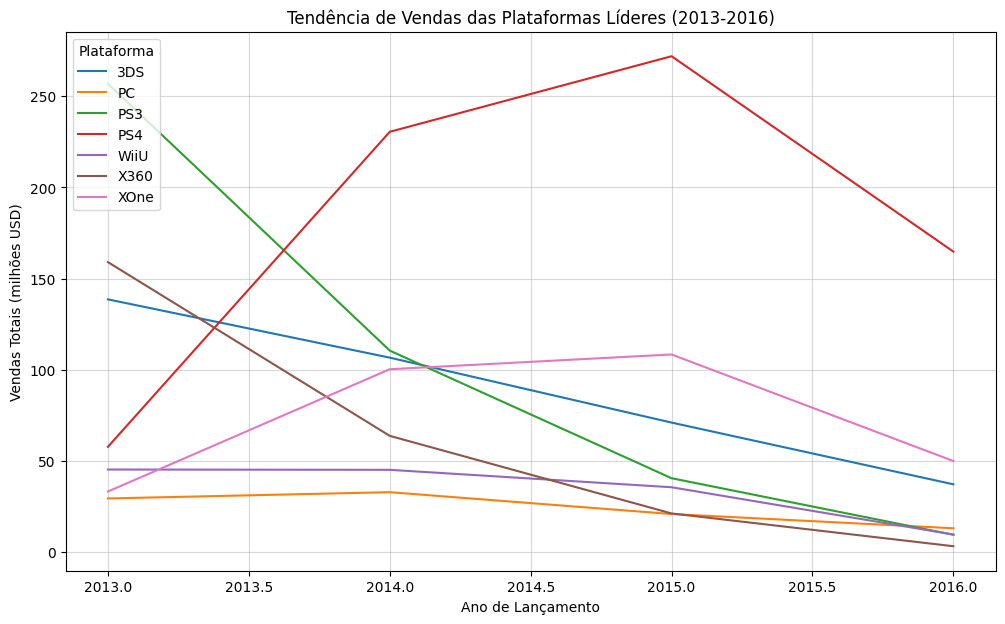

In [ ]:
#  Celula 4: Vendas Anuais das Plataformas Relevantes

# 1. Vendas totais por plataforma no período filtrado
platform_sales_current = data_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# As 7 plataformas líderes nesse período
print("Plataformas Líderes no Período 2013-2016:\n", platform_sales_current.head(7))

top_platforms_current = platform_sales_current.head(7).index.tolist()

# 3. Tabela dinâmica para ver as vendas de cada plataforma por ano
sales_by_platform_year_filtered = data_filtered[data_filtered['platform'].isin(top_platforms_current)].pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).fillna(0) # Preenche com 0 onde não houve vendas em um determinado ano

# 4. Plotar o gráfico de linhas
plt.figure(figsize=(12, 7))
sales_by_platform_year_filtered.plot(kind='line', ax=plt.gca()) # ax=plt.gca() usa a figura atual
plt.title('Tendência de Vendas das Plataformas Líderes (2013-2016)')
plt.ylabel('Vendas Totais (milhões USD)')
plt.xlabel('Ano de Lançamento')
plt.grid(True, alpha=0.5)
plt.legend(title='Plataforma', loc='upper left')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4696\3726632318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=data_box, palette='viridis')


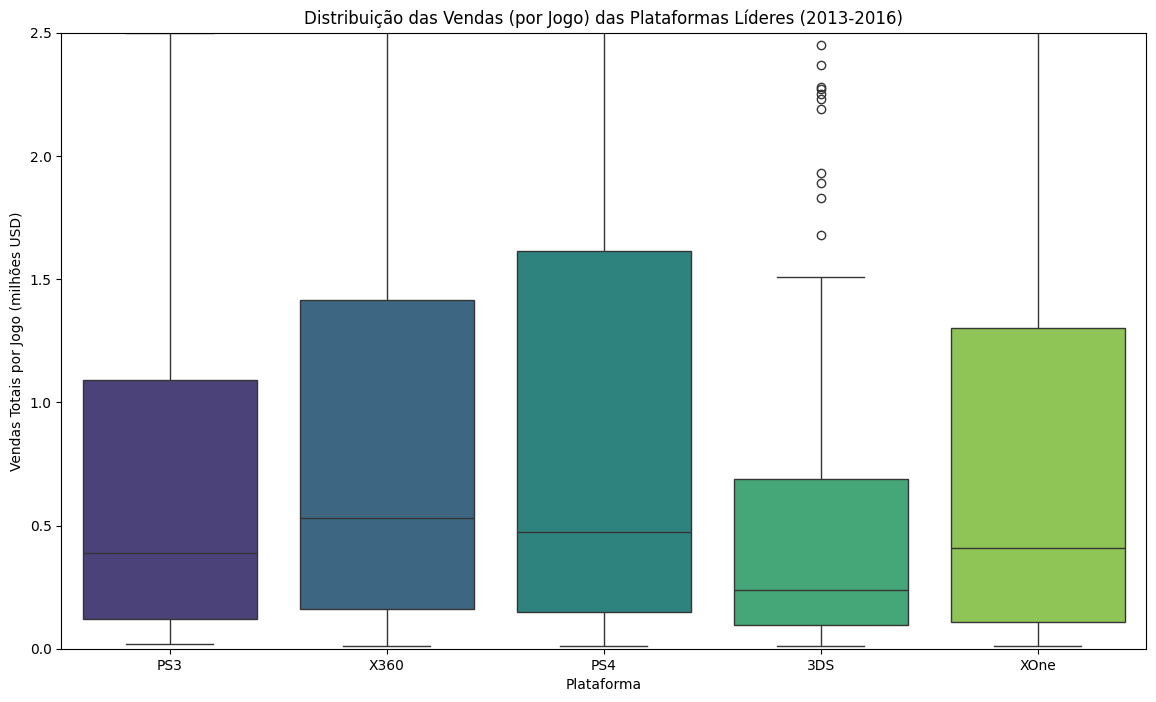


Estatísticas das Vendas Totais por Plataforma (Média e Mediana):
              mean  median
platform                  
PS4       1.849337   0.475
X360      1.328387   0.530
PS3       1.209536   0.390
XOne      1.181053   0.410
3DS       1.166172   0.240


In [ ]:
# Célula 5: Diagrama de Caixa das Vendas Globais por Plataforma

platforms_to_plot = platform_sales_current.head(5).index.tolist()
data_box = data_filtered[data_filtered['platform'].isin(platforms_to_plot)]

plt.figure(figsize=(14, 8))
# Usamos o seaborn para um boxplot claro
sns.boxplot(x='platform', y='total_sales', data=data_box, palette='viridis') 

# Limitamos o eixo Y para melhor visualização da distribuição central 
# (os jogos mais vendidos são outliers muito grandes)
plt.ylim(0, 2.5) 
plt.title('Distribuição das Vendas (por Jogo) das Plataformas Líderes (2013-2016)')
plt.ylabel('Vendas Totais por Jogo (milhões USD)')
plt.xlabel('Plataforma')
plt.show()

# Estatísticas detalhadas (medi, quartis, média).
print("\nEstatísticas das Vendas Totais por Plataforma (Média e Medi):")
sales_stats = data_box.groupby('platform')['total_sales'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
print(sales_stats)

--- ANÁLISE REGIONAL (PLATAFORMAS) ---


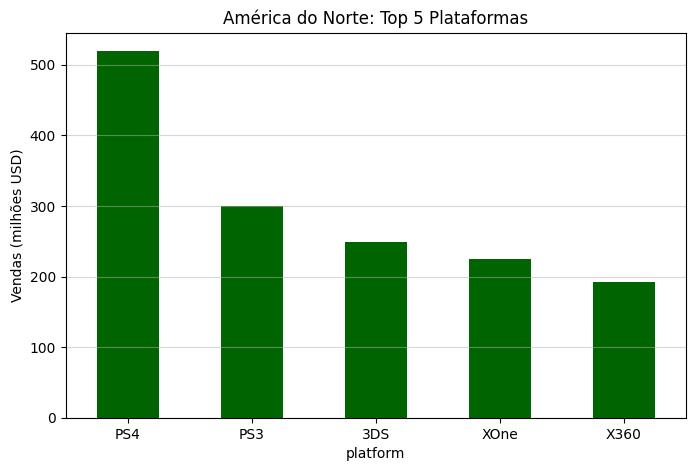

Top 5 platforms na Região:
 platform
PS4     519.54
PS3     299.36
3DS     248.30
XOne    225.52
X360    191.94
Name: na_sales, dtype: float64


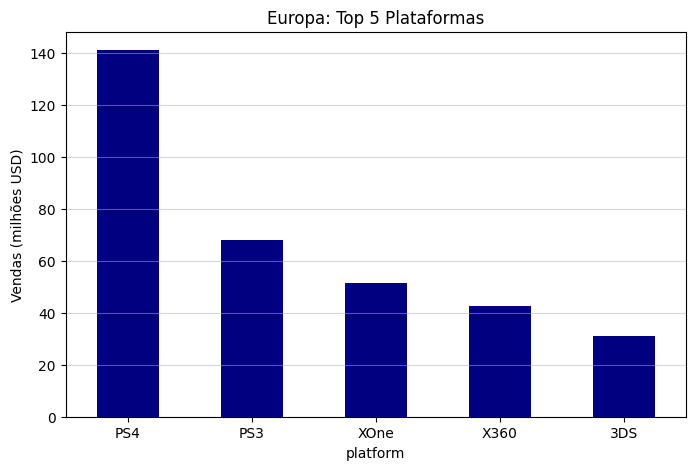

Top 5 platforms na Região:
 platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


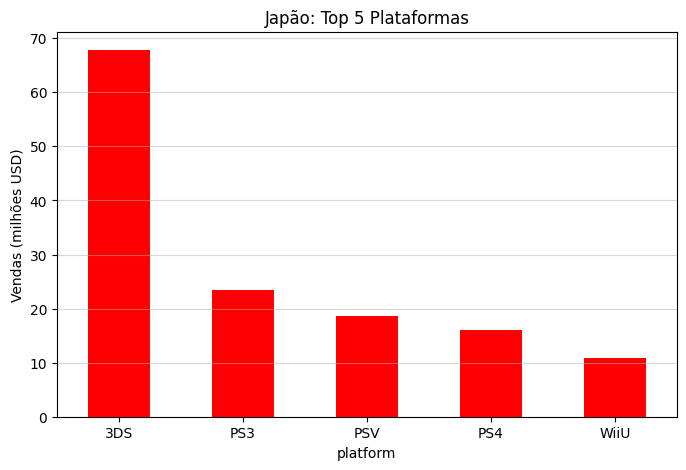

Top 5 platforms na Região:
 platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


In [ ]:
# Célula 6: Regional de Plataformas (2013-2016)

def top_5_plot_regional(data, group_col, sales_col, title, color):
    # Agrupa pela coluna (ex: 'platform') e soma a coluna de vendas (ex: 'na_sales')
    top_5 = data.groupby(group_col)[sales_col].sum().sort_values(ascending=False).head(5)
    
    plt.figure(figsize=(8, 5))
    top_5.plot(kind='bar', title=title, color=color)
    plt.ylabel('Vendas (milhões USD)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.5)
    plt.show()
    print(f"Top 5 {group_col}s na Região:\n", top_5)


print("--- ANÁLISE REGIONAL (PLATAFORMAS) ---")

# América do Norte (NA)
top_5_plot_regional(data_filtered, 'platform', 'na_sales', 'América do Norte: Top 5 Plataformas', 'darkgreen')

# Europa (EU)
top_5_plot_regional(data_filtered, 'platform', 'eu_sales', 'Europa: Top 5 Plataformas', 'navy')

# Japão (JP)
top_5_plot_regional(data_filtered, 'platform', 'jp_sales', 'Japão: Top 5 Plataformas', 'red')

--- ANÁLISE REGIONAL (GÊNEROS) ---


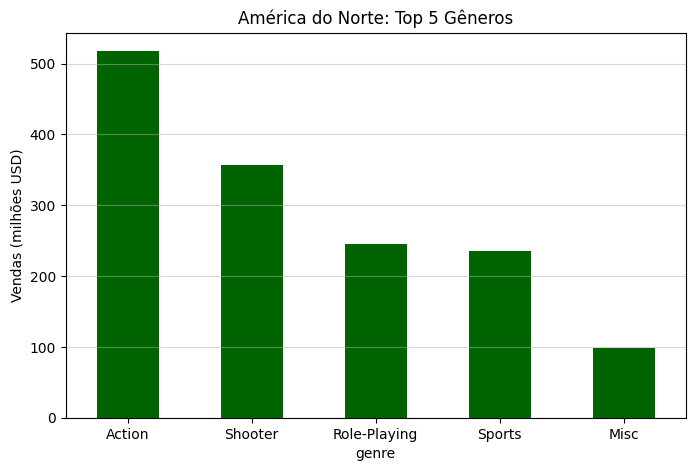

Top 5 genres na Região:
 genre
Action          517.69
Shooter         356.22
Role-Playing    245.38
Sports          236.03
Misc             98.15
Name: na_sales, dtype: float64


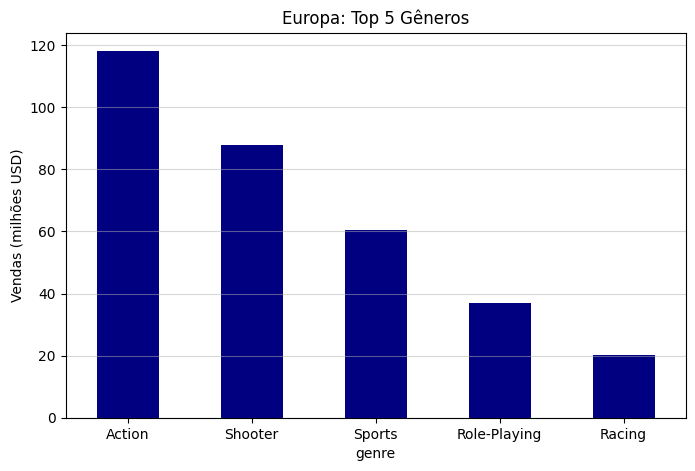

Top 5 genres na Região:
 genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


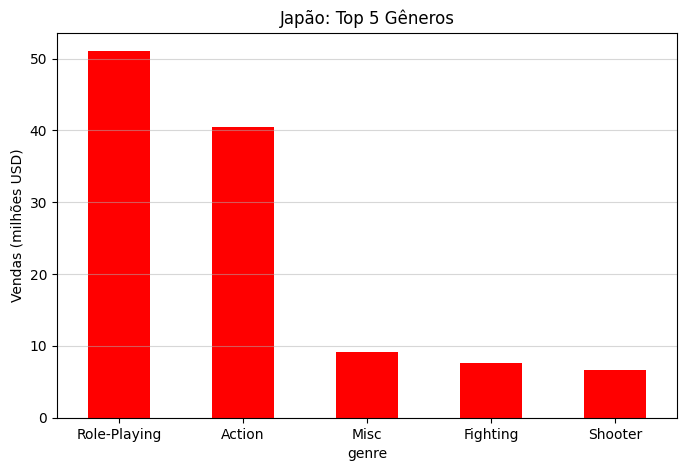

Top 5 genres na Região:
 genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


In [42]:
# Célula 7: Análise Regional de Gêneros (2013-2016)

print("--- ANÁLISE REGIONAL (GÊNEROS) ---")

# América do Norte (NA)
top_5_plot_regional(data_filtered, 'genre', 'na_sales', 'América do Norte: Top 5 Gêneros', 'darkgreen')

# Europa (EU)
top_5_plot_regional(data_filtered, 'genre', 'eu_sales', 'Europa: Top 5 Gêneros', 'navy')

# Japão (JP)
top_5_plot_regional(data_filtered, 'genre', 'jp_sales', 'Japão: Top 5 Gêneros', 'red')

--- ANÁLISE REGIONAL (CLASSIFICAÇÃO ESRB) ---


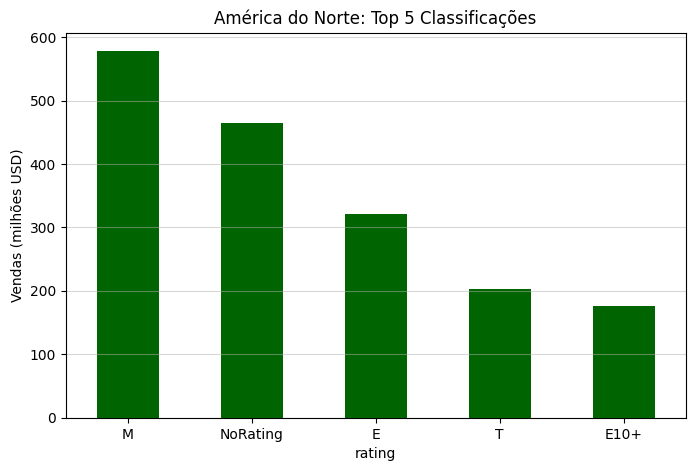

Top 5 ratings na Região:
 rating
M           578.15
NoRating    464.26
E           321.27
T           203.45
E10+        176.54
Name: na_sales, dtype: float64


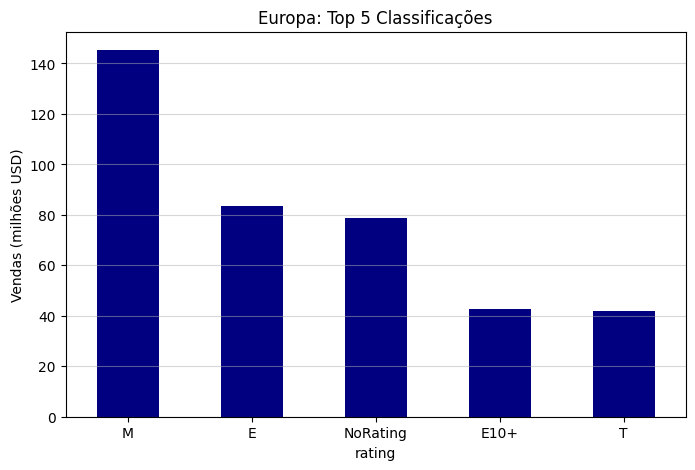

Top 5 ratings na Região:
 rating
M           145.32
E            83.36
NoRating     78.91
E10+         42.69
T            41.95
Name: eu_sales, dtype: float64


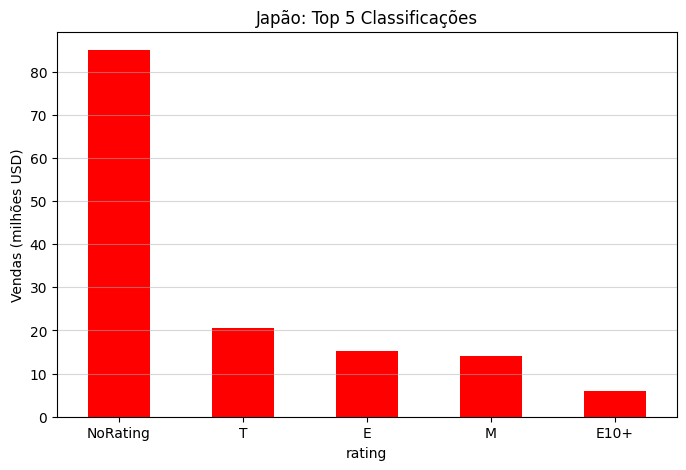

Top 5 ratings na Região:
 rating
NoRating    85.05
T           20.59
E           15.14
M           14.11
E10+         5.89
Name: jp_sales, dtype: float64


In [43]:
# Célula 8: Análise Regional de Classificação Etária (2013-2016)

print("--- ANÁLISE REGIONAL (CLASSIFICAÇÃO ESRB) ---")

# América do Norte (NA)
top_5_plot_regional(data_filtered, 'rating', 'na_sales', 'América do Norte: Top 5 Classificações', 'darkgreen')

# Europa (EU)
top_5_plot_regional(data_filtered, 'rating', 'eu_sales', 'Europa: Top 5 Classificações', 'navy')

# Japão (JP)
top_5_plot_regional(data_filtered, 'rating', 'jp_sales', 'Japão: Top 5 Classificações', 'red')

In [45]:
from scipy import stats as st

# Célula 10: Teste de Hipótese 1 - XOne vs PS4 (User Score)

# 1. Preparar os dados (filtrar e remover nulos)
ps4_na_scores = data_filtered.loc[(data_filtered['platform'] == 'PS4') & (data_filtered['na_sales'] > 0), 'user_score'].dropna()
xone_na_scores = data_filtered.loc[(data_filtered['platform'] == 'XOne') & (data_filtered['na_sales'] > 0), 'user_score'].dropna()

# 2. Teste T de Student (assumindo variâncias desiguais, 'equal_var=False')
alpha = 0.05 # Nível de significância
results_h1 = st.ttest_ind(ps4_na_scores, xone_na_scores, equal_var=False)

# 3. Análise dos Resultados
print(f"P-value: {results_h1.pvalue}")

if results_h1.pvalue < alpha:
    print("\nRejeitamos a Hipótese Nula: As pontuações médias de XOne e PS4 na NA são ESTATISTICAMENTE DIFERENTES.")
else:
    print("\nNão rejeitamos a Hipótese Nula: As pontuações médias de XOne e PS4 na NA são ESTATISTICAMENTE IGUAIS.")

P-value: 0.09855299487302606

Não rejeitamos a Hipótese Nula: As pontuações médias de XOne e PS4 na NA são ESTATISTICAMENTE IGUAIS.


In [46]:
# Célula 11: Teste de Hipótese 2 - Action vs Sports (User Score na Europa)

# 1. Preparar os dados (filtrar por gênero e remover nulos)
action_eu_scores = data_filtered.loc[(data_filtered['genre'] == 'Action') & (data_filtered['eu_sales'] > 0), 'user_score'].dropna()
sports_eu_scores = data_filtered.loc[(data_filtered['genre'] == 'Sports') & (data_filtered['eu_sales'] > 0), 'user_score'].dropna()

# 2. Teste T de Student (mantemos equal_var=False)
alpha = 0.05 # Nível de significância
results_h2 = st.ttest_ind(action_eu_scores, sports_eu_scores, equal_var=False)

# 3. Análise dos Resultados
print(f"P-value: {results_h2.pvalue}")

if results_h2.pvalue < alpha:
    print("\nRejeitamos a Hipótese Nula: As pontuações médias de Action e Sports na UE são ESTATISTICAMENTE DIFERENTES.")
else:
    print("\nNão rejeitamos a Hipótese Nula: As pontuações médias de Action e Sports na UE são ESTATISTICAMENTE IGUAIS.")

P-value: 5.8424000091832105e-21

Rejeitamos a Hipótese Nula: As pontuações médias de Action e Sports na UE são ESTATISTICAMENTE DIFERENTES.
